# Random Forest

Random Forests consistently work better than single decision trees because they overcome the major weakness of individual trees: overfitting. A single, complex decision tree can memorize the noise and outliers in the training data, resulting in a model that is brittle and performs poorly on new, unseen data.

### Ensemble

An "ensemble" is a combination of many individual models (the "base learners") whose predictions are averaged or voted on to produce a more accurate, stable, and robust final prediction.

**n_estimators**

n_estimators controls the number of trees in the forest. More trees generally increase accuracy by reducing variance, but also increase training time.

**max_depth**

max_depth limits the maximum number of splits each individual tree can make. This prevents any single tree from becoming too complex and overfitting the training data, while the ensemble still captures complex patterns.

## Practical

### Loading dataset

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

### Train Test Split

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Models Selection

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models ={
    "LogisticRegression" : LogisticRegression(max_iter=200),
    "KNN" : KNeighborsClassifier(n_neighbors=5),
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "Random Forest" : RandomForestClassifier(n_estimators=100, random_state=42)
}

results = []

### Model Training and Prediction

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_predict(model, X, y, cv=5)
    results.append({
        "Model" : name,
        "Accuracy" : acc,
        "CV_mean" : np.mean(cv_scores)
    })
    print("\nAccuracy: ",acc)
    print("\nConfusion matrix:\n",confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n",classification_report(y_test, y_pred))


Accuracy:  1.0

Confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy:  1.0

Confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy:  1.0

Confusion matrix:
 [[10  

### Results Table

In [11]:
import pandas as pd
df_results = pd.DataFrame(results)
print("Moodel Comparison\n", df_results)

Moodel Comparison
                 Model  Accuracy   CV_mean
0  LogisticRegression       1.0  1.013333
1                 KNN       1.0  1.013333
2       Decision Tree       1.0  0.993333
3       Random Forest       1.0  1.006667


### Random Forest Feature Importance

In [15]:
rf = models["Random Forest"]
importances = rf.feature_importances_
features= iris.feature_names

### Plotting

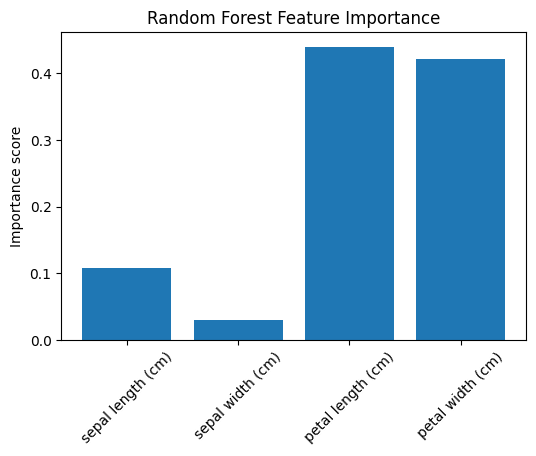

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.bar(features, importances)
plt.title("Random Forest Feature Importance")
plt.ylabel("Importance score")
plt.xticks(rotation=45)
plt.show()
